# Content

<ul>
    <li> Dataframes </li>
    <li> Training </li>
</ul>

## Indroduction

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../../')
import models.models as m
import pandas as pd

This notebook, uses the testing data as input to the neural network. This will check if its is making the correct predictions.

## Dataframes

We want to see the data in the actual data simulation, and the predictions data that the neural network provides. The following code fragements below shows this

In [16]:
DELTA = 1
SIMULATIONS = 200
    
# This will produce test data from tempreture ranging 61-100, starting t(0) = initial = temp
initial_temp = [i for i in range(61, 90)]
for t_0 in initial_temp:
    COOLING = m.State("Cooling", lambda temp: True, lambda temp: -0.015*(temp - 22))
    newtons = m.Automata(COOLING, [COOLING], [lambda temp: True], t_0)
    newtons.run(t_0, DELTA, SIMULATIONS, "../../data/test/newtons_cooling_law.csv")

# This will produce carrying on from the simulations from the training set. 
# It will carry on from where each simulation for a inital temp stopped at (199).
# And carry on getting the rest of the simulation
initial_temp = [i for i in range(1, 10)]
for t_0 in initial_temp:
    COOLING = m.State("Cooling", lambda temp: True, lambda temp: -0.015*(temp - 22))
    newtons = m.Automata(COOLING, [COOLING], [lambda temp: True], t_0)
    df = pd.read_csv("../../data/train/newtons_cooling_law.csv", usecols=[0,1,2])
    df = pd.DataFrame(data=df)
    #df[df.x_0 == t_0][df.x == 199].y.item()

    # Gets value from training set. This is to carry on from the simulations for the training set.
    data = df.query("x_0 == {} & x == {}".format(t_0, 199)).y.item() 
    newtons.run(data, DELTA, SIMULATIONS+1, "../../data/test/newtons_cooling_law.csv", 199)

In [17]:
filename = "../../data/test/newtons_cooling_law.csv"

In [18]:
newtons_law_df = pd.DataFrame(data= pd.read_csv(filename, usecols=[0,1,2]))
newtons_law_df

,x_0,x,y
0,61,0,61.000000
1,61,1,60.415000
2,61,2,59.838775
3,61,3,59.271193
4,61,4,58.712125
...,...,...,...
15213,9,395,21.966791
15214,9,396,21.967289
15215,9,397,21.967780
15216,9,398,21.968263


In [32]:
newtons_law_df_preds = pd.DataFrame(data= pd.read_csv("../../data/preds/test/newtons_cooling_law.csv"))
newtons_law_df_preds

,initial_temp,time,temp
0,61,0,60.472530
1,61,1,60.010437
2,61,2,59.548340
3,61,3,59.062115
4,61,4,58.575570
...,...,...,...
7604,9,395,23.543451
7605,9,396,23.555523
7606,9,397,23.567595
7607,9,398,23.579685


In [33]:
newtons_law_df = newtons_law_df.astype("float64")
newtons_law_df_compare = pd.merge(newtons_law_df, newtons_law_df_preds, right_index=True, left_index=True)
newtons_law_df_compare

,x_0,x,y,initial_temp,time,temp
0,61.0,0.0,61.000000,61,0,60.472530
1,61.0,1.0,60.415000,61,1,60.010437
2,61.0,2.0,59.838775,61,2,59.548340
3,61.0,3.0,59.271193,61,3,59.062115
4,61.0,4.0,58.712125,61,4,58.575570
...,...,...,...,...,...,...
7604,9.0,395.0,21.966791,9,395,23.543451
7605,9.0,396.0,21.967289,9,396,23.555523
7606,9.0,397.0,21.967780,9,397,23.567595
7607,9.0,398.0,21.968263,9,398,23.579685


In [34]:
newtons_law_df_compare = newtons_law_df_compare.rename(columns={"y": "data", "temp" : "preds"})
newtons_law_df_compare = newtons_law_df_compare.melt(["x_0","x","initial_temp","time"], var_name='temp', value_name='vals')
newtons_law_df_compare

,x_0,x,initial_temp,time,temp,vals
0,61.0,0.0,61,0,data,61.000000
1,61.0,1.0,61,1,data,60.415000
2,61.0,2.0,61,2,data,59.838775
3,61.0,3.0,61,3,data,59.271193
4,61.0,4.0,61,4,data,58.712125
...,...,...,...,...,...,...
15213,9.0,395.0,9,395,preds,23.543451
15214,9.0,396.0,9,396,preds,23.555523
15215,9.0,397.0,9,397,preds,23.567595
15216,9.0,398.0,9,398,preds,23.579685


## Visulising the data

This is newtons graph for the actual data

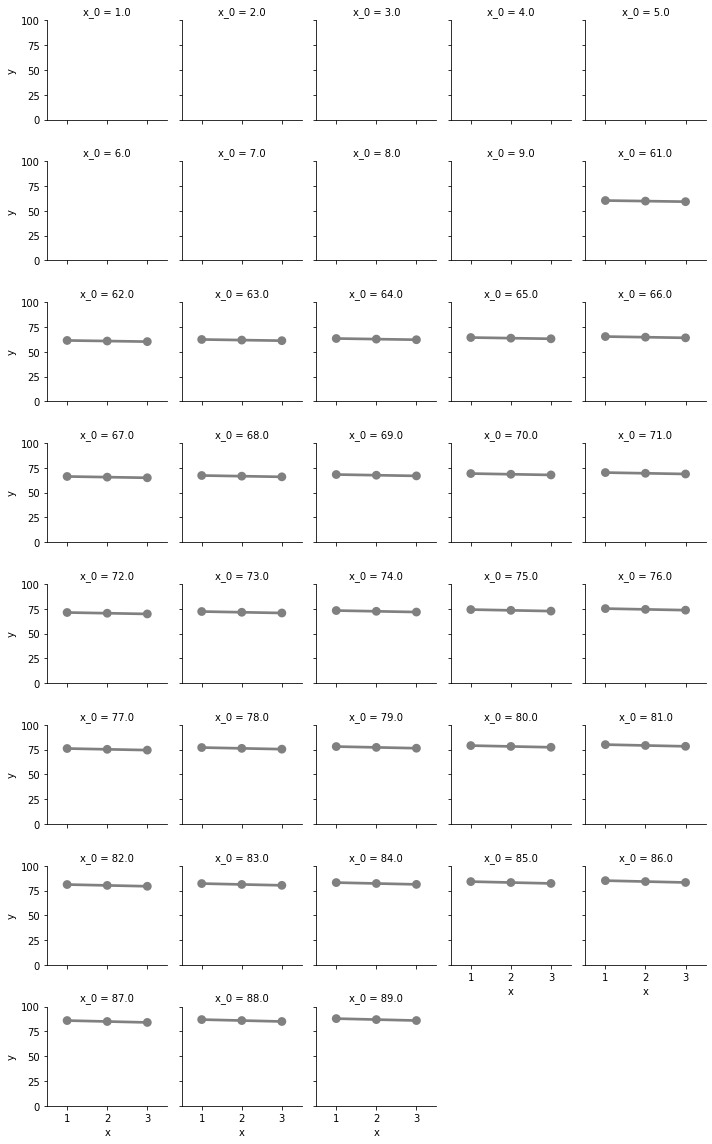

In [35]:
g = sns.FacetGrid(newtons_law_df, col="x_0",col_wrap=5, height=2, ylim=(0, 100))
g.map(sns.pointplot, "x", "y", order=[1, 2, 3], color=".5", ci=None)

This is newtons graphs for the predictions made by the neural network

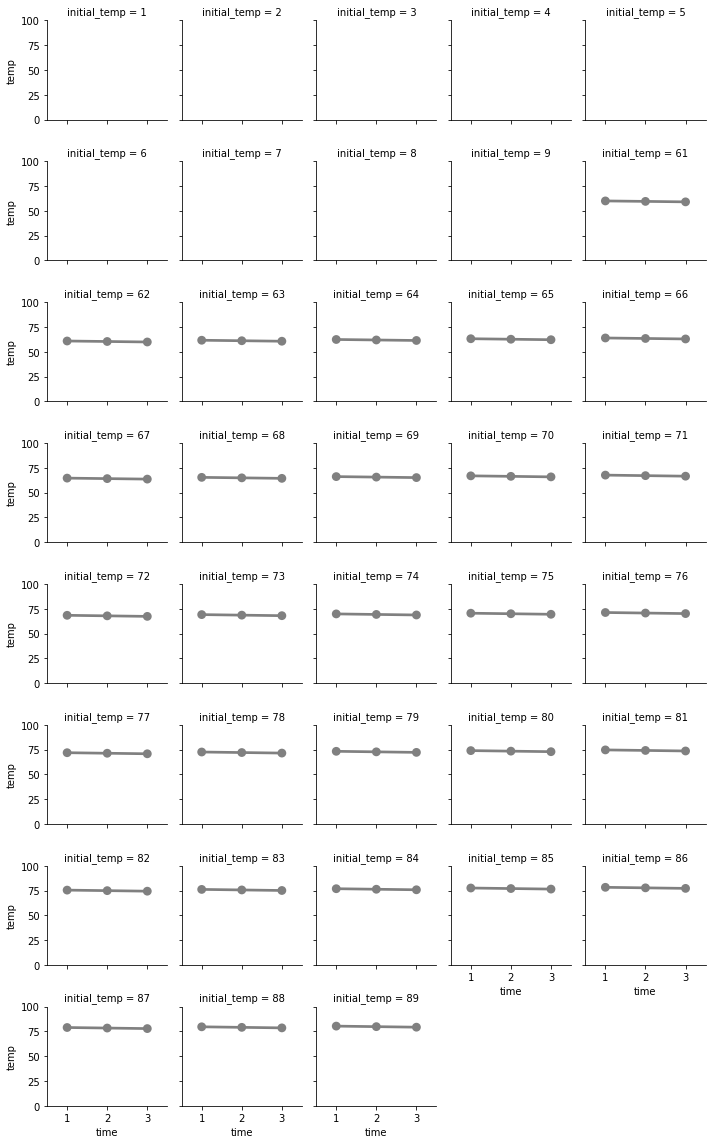

In [36]:
g = sns.FacetGrid(newtons_law_df_preds, col="initial_temp",col_wrap=5, height=2, ylim=(0, 100))
g.map(sns.pointplot, "time", "temp", order=[1, 2, 3], color=".5", ci=None)

Below would show a categorical graph defined by initial temp as a category and the temperature on the y axises.

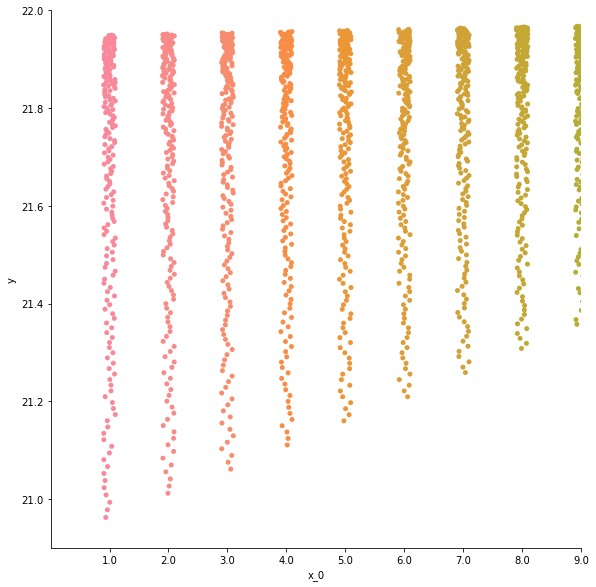

In [43]:
sns.catplot(height=8, data=newtons_law_df, x="x_0", y="y").set(xlim=(-1,8), ylim=(20.9,22))

This below show the predictions from the neural network

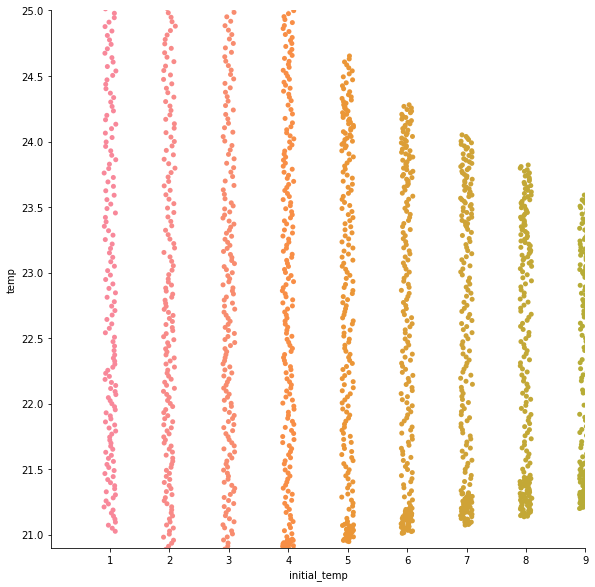

In [45]:
sns.catplot(height=8, data=newtons_law_df_preds, x="initial_temp", y="temp").set(xlim=(-1,8), ylim=(20.9,25))

## Combining both

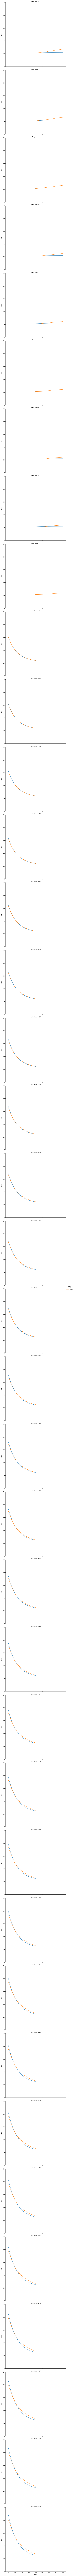

In [50]:
g = sns.FacetGrid(newtons_law_df_compare, hue="temp", col="initial_temp",col_wrap=1, height=8, ylim=(0, 100))
g.map(sns.lineplot, "time", "vals", ci=None)
g.add_legend()

From the graph it appears like the neural network is not good at predicting feature time series at when t>199. The neural network works better at predicting neural networks within the time series (0<=t<200), as it carries on with the trend.

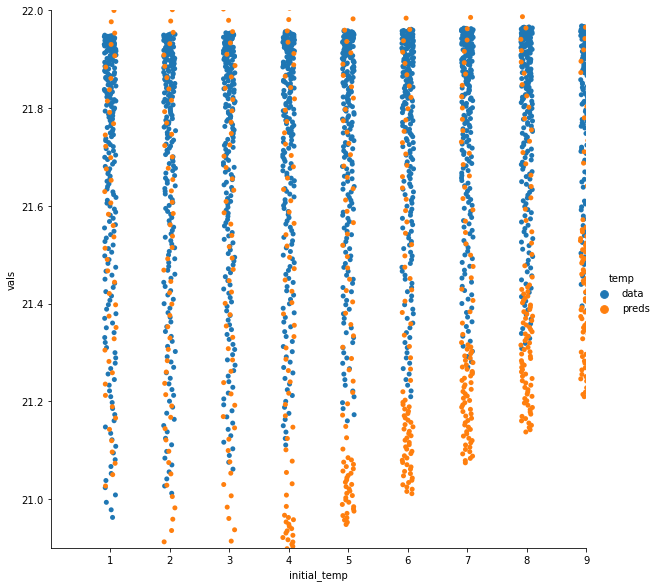

In [49]:
sns.catplot(height=8, data=newtons_law_df_compare, x="initial_temp", y="vals", hue="temp").set(xlim=(-1,8), ylim=(20.9,22))